# World Development Indicators and PISA Scores
## Is it possible to predict the scholastic performance of countries based on socio-economic indicators?  What happens to scholastic performance as we start to factor in world development indicators such as:
* Gender Equality
* Population
* Literacy
* Unemployment
* Industry

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import random
import re
import textwrap
import warnings
warnings.filterwarnings('ignore')
import csv
import seaborn as sbn

### World Development Indicators
#### We will begin by importing the data from the World Development Indicators dataset in Kaggle.  These data files contain various economic indicators from many countries around the world.  Some of the indicators you will see are:
* Age
* Population
* Gender
* Imports & Exports

In [10]:
Country = pd.read_csv('Country.csv')
CountryNotes = pd.read_csv('CountryNotes.csv')
Footnotes = pd.read_csv('Footnotes.csv')
Indicators = pd.read_csv('Indicators.csv')
Series = pd.read_csv('Series.csv')
SeriesNotes = pd.read_csv('SeriesNotes.csv')

### PISA Scores
#### The Programme for International Student Assessment, better known as PISA, is a worldwide study with the intent to evaluate education systems.  The study is done by the Organization for Economic Cooperation and Development (OECD) in member and non-member nations.   The evaluation is assesed by measuring the performance of 15 year old school students in the subjects of math, science, and reading.
#### The data used in this project brings in the PISA scores for 2013 to 2015.

In [11]:
PISA = pd.read_csv('PISA_Combine2.csv')

In [12]:
indicators = Indicators['IndicatorName'].unique().tolist()
indicators.sort()

In [14]:
indicators_list = Indicators[['IndicatorName','IndicatorCode']].drop_duplicates().values

In [15]:
indicators_list

array([['Adolescent fertility rate (births per 1,000 women ages 15-19)',
        'SP.ADO.TFRT'],
       ['Age dependency ratio (% of working-age population)',
        'SP.POP.DPND'],
       ['Age dependency ratio, old (% of working-age population)',
        'SP.POP.DPND.OL'],
       ...,
       ['Fish species, threatened', 'EN.FSH.THRD.NO'],
       ['Mammal species, threatened', 'EN.MAM.THRD.NO'],
       ['Plant species (higher), threatened', 'EN.HPT.THRD.NO']],
      dtype=object)

In [5]:
key_word_dict = {}

key_word_dict['Demography'] = ['population','birth','death','fertility','mortality','expectancy']
key_word_dict['Trade'] = ['trade','import','export','good','shipping','shipment']
key_word_dict['Health'] = ['health','desease','hospital','mortality','doctor']
key_word_dict['Economy'] = ['income','gdp','gini','deficit','budget','market','stock','bond','infrastructure','debt']
key_word_dict['Energy'] = ['fuel','energy','power','emission','electric','electricity']
key_word_dict['Education'] = ['education','literacy','youth']
key_word_dict['Employment'] =['employed','employment','umemployed','unemployment']

In [16]:
def pick_indicator(feature):
    
    for indicator_ele in Indicators.values:
        
        if feature not in key_word_dict.keys():
            print("Choose the right feature!")
            break
        
        for word in key_word_dict[feature]:
            
            word_list = indicator_ele[0].split() # it would split from ','
            
            if word in word_list or word+'s' in word_list:
                
                print(indicator_ele)
                
                break

In [19]:
pick_indicator('Health')

In [6]:
Country.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,SourceOfMostRecentIncomeAndExpenditureData,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2013.0,2000.0
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2011.0,2013.0,2006.0
2,DZA,Algeria,Algeria,People's Democratic Republic of Algeria,DZ,Algerian dinar,NaN,Middle East & North Africa,Upper middle income,DZ,...,Budgetary central government,General Data Dissemination System (GDDS),2008,"Multiple Indicator Cluster Survey (MICS), 2012","Integrated household survey (IHS), 1995",NaN,NaN,2010.0,2013.0,2001.0
3,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN
4,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN


In [7]:
Indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [8]:
Country['Region'].value_counts()

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

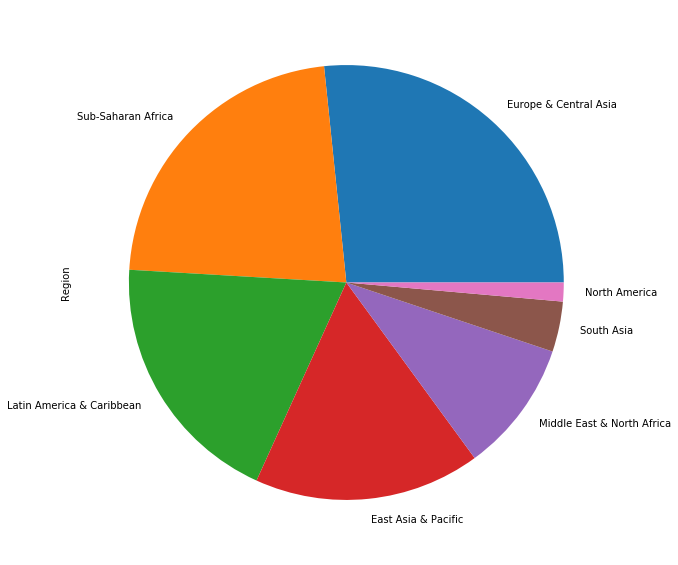

In [9]:
Country.Region.value_counts()[:7].plot.pie(figsize=(10,10))

In [10]:
Indicators['IndicatorName'].value_counts()

Population, total                                                                                                    13484
Population growth (annual %)                                                                                         13442
Urban population (% of total)                                                                                        13415
Rural population (% of total population)                                                                             13415
Urban population                                                                                                     13374
Rural population                                                                                                     13374
Urban population growth (annual %)                                                                                   13337
Surface area (sq. km)                                                                                                13090
Land area (sq. k

In [11]:
Indicators['IndicatorCode'].value_counts()

SP.POP.TOTL                 13484
SP.POP.GROW                 13442
SP.RUR.TOTL.ZS              13415
SP.URB.TOTL.IN.ZS           13415
SP.URB.TOTL                 13374
SP.RUR.TOTL                 13374
SP.URB.GROW                 13337
AG.SRF.TOTL.K2              13090
AG.LND.TOTL.K2              13086
SP.RUR.TOTL.ZG              13061
EN.POP.DNST                 12988
SP.DYN.CDRT.IN              12486
SP.ADO.TFRT                 12485
SP.DYN.CBRT.IN              12485
SP.POP.0014.TO.ZS           12426
SP.POP.TOTL.FE.ZS           12426
SP.POP.1564.TO.ZS           12426
SP.POP.65UP.TO.ZS           12426
SP.POP.DPND                 12423
SP.POP.DPND.YG              12423
SP.POP.DPND.OL              12423
SP.DYN.LE00.FE.IN           12304
SP.DYN.LE00.MA.IN           12304
SP.DYN.LE00.IN              12304
SP.DYN.TFRT.IN              12266
SP.DYN.TO65.FE.ZS           12258
SP.DYN.TO65.MA.ZS           12258
SP.DYN.AMRT.FE              11939
SP.DYN.AMRT.MA              11939
AG.LND.AGRI.K2

In [12]:
Series.head()

,SeriesCode,Topic,IndicatorName,ShortDefinition,LongDefinition,UnitOfMeasure,Periodicity,BasePeriod,OtherNotes,AggregationMethod,LimitationsAndExceptions,NotesFromOriginalSource,GeneralComments,Source,StatisticalConceptAndMethodology,DevelopmentRelevance,RelatedSourceLinks,OtherWebLinks,RelatedIndicators,LicenseType
0,BN.KLT.DINV.CD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net (BoP, current US$)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open
1,BX.KLT.DINV.WD.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (% of GDP)",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, International Fin...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
2,BX.KLT.DINV.CD.WD,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net inflows (BoP, c...",NaN,Foreign direct investment refers to direct inv...,NaN,Annual,NaN,NaN,Sum,FDI data do not give a complete picture of int...,NaN,Note: Data starting from 2005 are based on the...,"International Monetary Fund, Balance of Paymen...",Data on equity flows are based on balance of p...,Private financial flows - equity and debt - ac...,NaN,NaN,NaN,Open
3,BM.KLT.DINV.GD.ZS,Economic Policy & Debt: Balance of payments: C...,"Foreign direct investment, net outflows (% of ...",NaN,Foreign direct investment are the net inflows ...,NaN,Annual,NaN,NaN,Weighted average,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, International Fin...",NaN,NaN,NaN,NaN,NaN,Open
4,BN.TRF.KOGT.CD,Economic Policy & Debt: Balance of payments: C...,"Net capital account (BoP, current US$)",NaN,Net capital account records acquisitions and d...,NaN,Annual,NaN,NaN,NaN,NaN,NaN,Note: Data are based on the sixth edition of t...,"International Monetary Fund, Balance of Paymen...",NaN,NaN,NaN,NaN,NaN,Open


In [13]:
PISA.head()

,Year,Jurisdiction,CountryCode,Average,Standard Error,Area
0,2015,Albania,ALB,—,†,Math
1,2012,Albania,ALB,394,(2.0),Math
2,2009,Albania,ALB,377,(4.0),Math
3,2006,Albania,ALB,—,†,Math
4,2003,Albania,ALB,—,†,Math


In [14]:
PISA['Year'].value_counts()

2015    201
2012    201
2009    201
2006    201
2003    201
2000    201
Name: Year, dtype: int64

In [15]:
df1 = pd.read_csv("Country.csv")
df2 = pd.read_csv("PISA_Combine2.csv")

df = df1.merge(df2, on="CountryCode")

In [16]:
df3 = pd.read_csv("Indicators.csv")
df4 = df.merge(df3, on=['Year','CountryCode'])

In [17]:
df4.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,LatestWaterWithdrawalData,Year,Jurisdiction,Average,Standard Error,Area,CountryName,IndicatorName,IndicatorCode,Value
0,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,2006.0,2015,Albania,—,†,Math,Albania,Bank capital to assets ratio (%),FB.BNK.CAPA.ZS,9.7
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,2006.0,2015,Albania,—,†,Math,Albania,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,20.9
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,2006.0,2015,Albania,—,†,Math,Albania,"Bird species, threatened",EN.BIR.THRD.NO,10.0
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,2006.0,2015,Albania,—,†,Math,Albania,Business extent of disclosure index (0=less di...,IC.BUS.DISC.XQ,9.0
4,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,2006.0,2015,Albania,—,†,Math,Albania,Cost of business start-up procedures (% of GNI...,IC.REG.COST.PC.ZS,10.4


In [28]:
Full=df4[['ShortName', 'Region', 'IncomeGroup', 
          'Year', 'Area', 'IndicatorName', 'IndicatorCode', 'Value']]

In [29]:
Full.head()

,ShortName,Region,IncomeGroup,Year,Area,IndicatorName,IndicatorCode,Value
0,Albania,Europe & Central Asia,Upper middle income,2015,Math,Bank capital to assets ratio (%),FB.BNK.CAPA.ZS,9.7
1,Albania,Europe & Central Asia,Upper middle income,2015,Math,Bank nonperforming loans to total gross loans (%),FB.AST.NPER.ZS,20.9
2,Albania,Europe & Central Asia,Upper middle income,2015,Math,"Bird species, threatened",EN.BIR.THRD.NO,10.0
3,Albania,Europe & Central Asia,Upper middle income,2015,Math,Business extent of disclosure index (0=less di...,IC.BUS.DISC.XQ,9.0
4,Albania,Europe & Central Asia,Upper middle income,2015,Math,Cost of business start-up procedures (% of GNI...,IC.REG.COST.PC.ZS,10.4


In [99]:
df1.shape

(247, 31)

In [100]:
df2.shape

(1206, 6)

In [101]:
df.shape

(1206, 36)

In [84]:
df.head()

,CountryCode,ShortName,TableName,LongName,Alpha2Code,CurrencyUnit,SpecialNotes,Region,IncomeGroup,Wb2Code,...,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Year,Jurisdiction,Average,Standard Error,Area
0,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Yes,2012,2011.0,2013.0,2006.0,2015,Albania,—,†,Math
1,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Yes,2012,2011.0,2013.0,2006.0,2012,Albania,394,(2.0),Math
2,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Yes,2012,2011.0,2013.0,2006.0,2009,Albania,377,(4.0),Math
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Yes,2012,2011.0,2013.0,2006.0,2006,Albania,—,†,Math
4,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,Yes,2012,2011.0,2013.0,2006.0,2003,Albania,—,†,Math


In [91]:
df['Region'].value_counts()

Europe & Central Asia         684
Latin America & Caribbean     180
East Asia & Pacific           162
Middle East & North Africa    144
North America                  36
Name: Region, dtype: int64

In [97]:
df.groupby('Region').mean()

,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData,Year
Region,,,,
East Asia & Pacific,2009.888889,2013.000000,1999.666667,2007.5
Europe & Central Asia,2010.088235,2013.000000,2005.459459,2007.5
Latin America & Caribbean,2009.375000,2012.555556,2006.600000,2007.5
Middle East & North Africa,2009.625000,2012.750000,2003.500000,2007.5
North America,2009.500000,2013.000000,1995.500000,2007.5


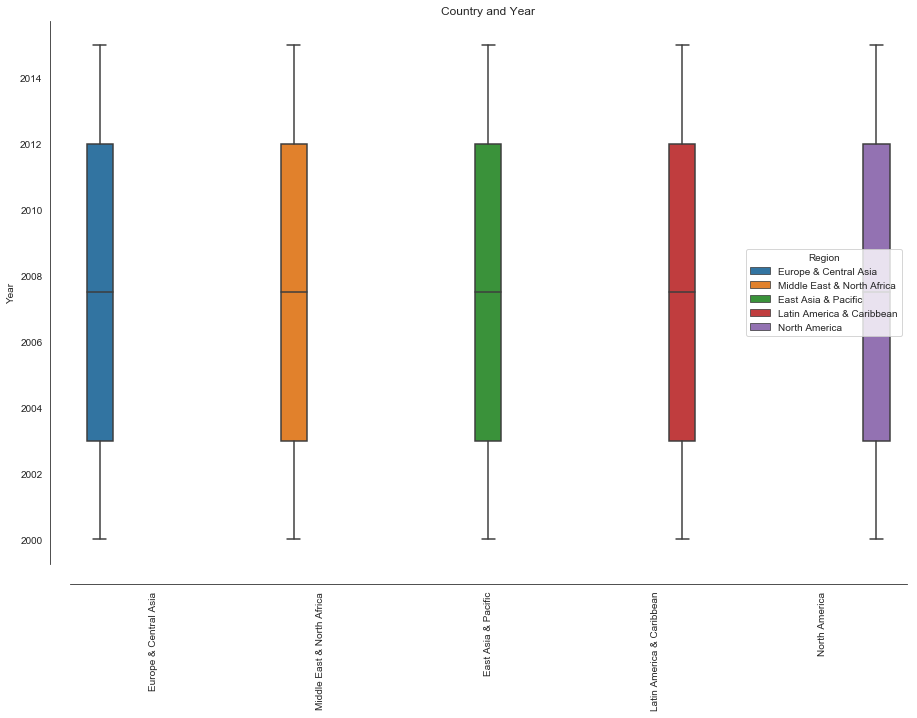

In [92]:
plt.figure(figsize=(15,10))
ax1 = sbn.boxplot(x="Region", y="Year", data=df, hue="Region")  
plt.title('Country and Year')
sbn.despine(offset=20)
plt.setp(ax1.get_xticklabels(), rotation=90)
ax1.set(xlabel='', ylabel='Year')

plt.show()